In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from fitter import Fitter, get_common_distributions

In [2]:
df = pd.read_excel('../data/블록-계획데이터(예제)_수정.xlsx')

In [3]:
df_revised = df.dropna(axis=0)
idx_1 = df_revised[df_revised['취부팀_코드'] == 'XXX'].index
df_revised = df_revised.drop(idx_1)
idx_2 = df_revised[df_revised['용접팀_코드'] == 'XXX'].index
df_revised = df_revised.drop(idx_2)
idx_3 = df_revised[df_revised['stage_코드'] == 'XXX'].index
df_revised = df_revised.drop(idx_3)
idx_4 = df_revised[df_revised['정반_코드'] == 'XXXX'].index
df_revised = df_revised.drop(idx_4)
idx_5 = df_revised[df_revised['실적공기'] < 0].index
df_revised = df_revised.drop(idx_5)
idx_6 = df_revised[df_revised['L'] == 815].index
df_revised = df_revised.drop(idx_6)
df_revised.reset_index(inplace=True)

In [4]:
df_revised_for_group = df_revised.copy()
group_list = []
for i in range(df_revised.shape[0]):
    group_code = df_revised.loc[i, '선종_코드'] + '_' + df_revised.loc[i, '블록'][0]
    group_list.append(group_code)
df_revised_for_group['선종_블록'] = group_list

In [5]:
df_revised_for_group

,index,정반_코드,호선_코드,블록,단위블록_CODE,공종_명칭,stage_코드,선종_코드,취부팀_코드,용접팀_코드,...,실적공기,H00,H01,H02,W,B,L,H,A,선종_블록
0,2,M212,CN047,S22S0,11A0,Final조립,S032,CN,B02,B02,...,22.0,0,1469,766,150,17.5,21.0,8.0,367.5,CN_S
1,3,M024,CN011,E22P0,11A0,곡중조,S021,CN,B04,B04,...,7.0,17,475,914,0,13.0,18.0,4.5,234.0,CN_E
2,4,M211,BC001,F51P0,05A0,Final조립,S032,BC,B02,B02,...,15.0,0,623,386,126,17.5,23.0,6.0,402.5,BC_F
3,9,M012,TK011,F51S0,11B0,곡중조,S021,VL,A03,A04,...,7.0,40,267,145,0,6.5,7.0,9.5,45.5,VL_F
4,12,M025,LN017,B19S0,03A0,Final조립,S032,LN,A05,B03,...,11.0,70,492,243,124,18.0,19.0,3.0,342.0,LN_B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6933,11955,M221,CN034,B20P0,03B0,대조중조,S031,CN,B09,B09,...,7.0,0,521,593,0,8.0,19.5,2.5,156.0,CN_B
6934,11959,M011,LP004,S13P0,03A0,곡중조,S221,LP,B07,B07,...,6.0,0,318,0,0,5.0,19.5,6.5,97.5,LP_S
6935,11960,M011,LP004,S13S0,03A0,곡중조,S221,LP,B07,B07,...,5.0,0,318,0,0,5.0,19.5,6.5,97.5,LP_S
6936,11971,M033,LN004,S11P0,11A0,Final조립,S032,LN,B08,B08,...,5.0,0,427,435,121,24.5,19.0,9.5,465.5,LN_S


In [6]:
group_df = pd.DataFrame(df_revised_for_group['선종_블록'].value_counts())

In [7]:
group_df

,count
선종_블록,
CN_E,1192
CN_B,808
LN_E,718
CN_S,690
CN_F,397
LN_F,299
LN_B,294
CN_A,249
LP_S,224


In [9]:
final_df = df_revised_for_group[df_revised_for_group['공종_명칭'] == 'Final조립']
final_group_df = pd.DataFrame(final_df['선종_블록'].value_counts())

In [11]:
final_group_df

,count
선종_블록,
CN_E,524
CN_S,427
LN_E,332
LN_B,142
LN_S,134
CN_F,131
LN_F,114
CN_A,105
TK_E,83


In [14]:
final_df = df_revised_for_group[df_revised_for_group['공종_명칭'] == '평중조']
final_group_df = pd.DataFrame(final_df['선종_블록'].value_counts())
final_group_df.sort_index(inplace=True)

In [19]:
final_df = df_revised_for_group[df_revised_for_group['공종_명칭'] == '곡중조']
final_group_df = pd.DataFrame(final_df['선종_블록'].value_counts())
final_group_df.sort_index(inplace=True)

In [21]:
final_df = df_revised_for_group[df_revised_for_group['공종_명칭'] == '대조중조']
final_group_df = pd.DataFrame(final_df['선종_블록'].value_counts())
final_group_df.sort_index(inplace=True)

In [22]:
final_group_df

,count
선종_블록,
BC_A,1
BC_E,1
BC_F,2
BC_S,5
CN_A,76
CN_B,293
CN_D,40
CN_E,317
CN_F,46


In [18]:
group_df.sort_index(inplace=True)
group_df

,count
선종_블록,
BC_A,3
BC_B,11
BC_E,14
BC_F,14
BC_S,10
CN_A,249
CN_B,808
CN_D,119
CN_E,1192


In [6]:
df_revised_for_group.to_excel('../data/블록-계획데이터(예제)_수정_선종블록 추가.xlsx')

L, B, H 피팅

In [8]:
# L 피팅
df_revised_for_group_count = pd.DataFrame(df_revised_for_group['선종_블록'].value_counts())
df_revised_for_group_count.sort_index(inplace=True)
df_revised_for_group_count.reset_index(inplace=True)
df_revised_for_group_count

,선종_블록,count
0,BC_A,3
1,BC_B,11
2,BC_E,14
3,BC_F,14
4,BC_S,10
5,CN_A,249
6,CN_B,808
7,CN_D,119
8,CN_E,1192
9,CN_F,397


In [34]:
def calculate_std(group_code, process, property):
    df_group = df_revised_for_group[df_revised_for_group['선종_블록'] == group_code]
    df_group_process = df_group[df_group['공종_명칭'] == process]

    std = np.std(df_group_process[property])
    return std

In [33]:
calculate_std('CN_B', 'Final조립', 'L')

1.7539962178523751

In [40]:
columns = ['선종_블록', '공종_명칭', 'property', '표준편차']

df_L_std = []

for group in df_revised_for_group_count['선종_블록']:
    df_group = df_revised_for_group[df_revised_for_group['선종_블록'] == group]
    for process in ['Final조립', '평중조', '곡중조', '대조중조']:

        L_std = calculate_std(group, process, 'L')
        row = [group, process, 'L', L_std]
        df_L_std.append(row)

df_L_std = pd.DataFrame(df_L_std, columns = columns)

In [45]:
columns = ['선종_블록', '공종_명칭', 'property', '표준편차']

df_W_std = []

for group in df_revised_for_group_count['선종_블록']:
    W_std = calculate_std(group, 'Final조립', 'W')
    row = [group, 'Final조립', 'W', W_std]
    df_W_std.append(row)

df_W_std = pd.DataFrame(df_W_std, columns = columns)

In [94]:
df_CN_E = df_revised_for_group[df_revised_for_group['선종_블록'] == 'BC_E']
df_CN_E_final = df_CN_E[df_CN_E['공종_명칭'] == 'Final조립']
df_CN_E_final.reset_index(inplace=True)

df_CN_E_final['LBH'] = df_CN_E_final['L'] * df_CN_E_final['B'] * df_CN_E_final['H']
x = df_CN_E_final['LBH'].to_numpy()
x = x.reshape(-1, 1)

y = df_CN_E_final['W']

reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(x, y)

y_pred_1 = reg.predict(x)
error_list = []
for i in range(df_CN_E_final.shape[0]):
    error = y_pred_1[i] - y.loc[i]
    error_list.append(error)

standard_error = np.std(error_list)

y_pred_2 = reg.predict(x) + np.random.normal(0, standard_error, size=df_CN_E_final.shape[0])

df_CN_E_final['fit_result'] = y_pred_1
df_CN_E_final['fit_result_noise'] = y_pred_2

print("회귀 계수: " + str(reg.coef_))
print("노이즈 :", standard_error)

회귀 계수: [0.06914624]
노이즈 : 16.419069405863866


C:\Users\kimjh\AppData\Local\Temp\ipykernel_43868\3037031467.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_E_final['LBH'] = df_CN_E_final['L'] * df_CN_E_final['B'] * df_CN_E_final['H']
C:\Users\kimjh\AppData\Local\Temp\ipykernel_43868\3037031467.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_E_final['fit_result'] = y_pred_1
C:\Users\kimjh\AppData\Local\Temp\ipykernel_43868\3037031467.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [111]:
def make_W_fitting_noise(group):
    df_CN_E = df_revised_for_group[df_revised_for_group['선종_블록'] == group]
    df_CN_E_final = df_CN_E[df_CN_E['공종_명칭'] == 'Final조립']
    df_CN_E_final.reset_index(inplace=True)

    df_CN_E_final['LBH'] = df_CN_E_final['L'] * df_CN_E_final['B'] * df_CN_E_final['H']
    x = df_CN_E_final['LBH'].to_numpy()
    x = x.reshape(-1, 1)

    y = df_CN_E_final['W']

    reg = linear_model.LinearRegression(fit_intercept=False)
    reg.fit(x, y)

    y_pred_1 = reg.predict(x)
    error_list = []
    for i in range(df_CN_E_final.shape[0]):
        error = y_pred_1[i] - y.loc[i]
        error_list.append(error)

    standard_error = np.std(error_list)

    y_pred_2 = reg.predict(x) + np.random.normal(0, standard_error, size=df_CN_E_final.shape[0])

    df_CN_E_final['fit_result'] = y_pred_1
    df_CN_E_final['fit_result_noise'] = y_pred_2

    print("회귀 계수: " + str(reg.coef_))
    print("노이즈 :", standard_error)

    return df_CN_E_final, reg.coef_[0], standard_error

In [114]:
columns = ['선종_블록', 'coef', 'std']
df_variable = []

with pd.ExcelWriter('../data/W 피팅_noise.xlsx') as writer:
    for code in df_revised_for_group_count['선종_블록']:
        if code in ['CN_T', 'LN_D', 'VL_D']:
            continue
        else:
            df_duration_code, coef, std = make_W_fitting_noise(code)
            row = [code, coef, std]
            df_variable.append(row)
            df_duration_code.to_excel(writer, sheet_name=code)

df_variable = pd.DataFrame(df_variable, columns = columns)
# df_variable.to_excel('../data/그룹별 W 변수.xlsx')

C:\Users\kimjh\AppData\Local\Temp\ipykernel_43868\4285040558.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_E_final['LBH'] = df_CN_E_final['L'] * df_CN_E_final['B'] * df_CN_E_final['H']
C:\Users\kimjh\AppData\Local\Temp\ipykernel_43868\4285040558.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_E_final['fit_result'] = y_pred_1
C:\Users\kimjh\AppData\Local\Temp\ipykernel_43868\4285040558.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

회귀 계수: [0.07351291]
노이즈 : 3.5
회귀 계수: [0.12640333]
노이즈 : 0.0
회귀 계수: [0.06914624]
노이즈 : 16.419069405863866
회귀 계수: [0.05993159]
노이즈 : 19.710210701163497
회귀 계수: [0.06459427]
노이즈 : 5.025636162222071
회귀 계수: [0.08753603]
노이즈 : 33.67060683828755
회귀 계수: [0.09959042]
노이즈 : 64.49762303095503
회귀 계수: [0.07521236]
노이즈 : 9.823730016626454
회귀 계수: [0.07343948]
노이즈 : 44.195276724088735


C:\Users\kimjh\AppData\Local\Temp\ipykernel_43868\4285040558.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_E_final['LBH'] = df_CN_E_final['L'] * df_CN_E_final['B'] * df_CN_E_final['H']
C:\Users\kimjh\AppData\Local\Temp\ipykernel_43868\4285040558.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_E_final['fit_result'] = y_pred_1
C:\Users\kimjh\AppData\Local\Temp\ipykernel_43868\4285040558.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

회귀 계수: [0.07558984]
노이즈 : 47.69280768698817
회귀 계수: [0.06444414]
노이즈 : 40.91592191024406
회귀 계수: [0.05609933]
노이즈 : 17.817039936462308
회귀 계수: [0.12682462]
노이즈 : 45.255080169973155


C:\Users\kimjh\AppData\Local\Temp\ipykernel_43868\4285040558.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_E_final['LBH'] = df_CN_E_final['L'] * df_CN_E_final['B'] * df_CN_E_final['H']
C:\Users\kimjh\AppData\Local\Temp\ipykernel_43868\4285040558.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_E_final['fit_result'] = y_pred_1
C:\Users\kimjh\AppData\Local\Temp\ipykernel_43868\4285040558.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

회귀 계수: [0.06709994]
노이즈 : 31.764131954822226
회귀 계수: [0.05228076]
노이즈 : 31.641525923428894
회귀 계수: [0.05114698]
노이즈 : 32.07484348891099
회귀 계수: [0.03005174]
노이즈 : 36.028924979114116
회귀 계수: [0.06981548]
노이즈 : 15.734612286356006
회귀 계수: [0.09706337]
노이즈 : 26.906209550617152
회귀 계수: [0.05893714]
노이즈 : 25.270168431622647
회귀 계수: [0.06629781]
노이즈 : 29.810539897654294


C:\Users\kimjh\AppData\Local\Temp\ipykernel_43868\4285040558.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_E_final['LBH'] = df_CN_E_final['L'] * df_CN_E_final['B'] * df_CN_E_final['H']
C:\Users\kimjh\AppData\Local\Temp\ipykernel_43868\4285040558.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_E_final['fit_result'] = y_pred_1
C:\Users\kimjh\AppData\Local\Temp\ipykernel_43868\4285040558.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

회귀 계수: [0.0569286]
노이즈 : 10.963191110846406
회귀 계수: [0.0644164]
노이즈 : 23.895295033358064
회귀 계수: [0.0492755]
노이즈 : 25.204943931857112
회귀 계수: [0.07934358]
노이즈 : 21.11573877812079
회귀 계수: [0.11691552]
노이즈 : 19.590147785512148
회귀 계수: [0.06797915]
노이즈 : 12.138768980251914
회귀 계수: [0.07178207]
노이즈 : 7.9690690677046465
회귀 계수: [0.05369009]
노이즈 : 9.881239559096976
회귀 계수: [0.04497343]
노이즈 : 5.140850061047975
회귀 계수: [0.03252033]
노이즈 : 0.0
회귀 계수: [0.0520432]
노이즈 : 17.521625419212963
회귀 계수: [0.07192749]
노이즈 : 15.55740402241783
회귀 계수: [0.0962268]
노이즈 : 45.80356724619174
회귀 계수: [0.04996334]
노이즈 : 37.2967468347081
회귀 계수: [0.06704536]
노이즈 : 19.5182117714405
회귀 계수: [0.08934577]
노이즈 : 54.87714407487044
회귀 계수: [0.06752774]
노이즈 : 17.396833590864226
회귀 계수: [0.07893577]
노이즈 : 30.121979806543994
회귀 계수: [0.12246154]
노이즈 : 3.7375769048745866


C:\Users\kimjh\AppData\Local\Temp\ipykernel_43868\4285040558.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_E_final['fit_result_noise'] = y_pred_2
C:\Users\kimjh\AppData\Local\Temp\ipykernel_43868\4285040558.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_E_final['LBH'] = df_CN_E_final['L'] * df_CN_E_final['B'] * df_CN_E_final['H']
C:\Users\kimjh\AppData\Local\Temp\ipykernel_43868\4285040558.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

회귀 계수: [0.06667193]
노이즈 : 20.059240760709525
회귀 계수: [0.07560374]
노이즈 : 29.624710525858955


In [115]:
df_variable

,선종_블록,coef,std
0,BC_A,0.073513,3.500000
1,BC_B,0.126403,0.000000
2,BC_E,0.069146,16.419069
3,BC_F,0.059932,19.710211
4,BC_S,0.064594,5.025636
5,CN_A,0.087536,33.670607
6,CN_B,0.099590,64.497623
7,CN_D,0.075212,9.823730
8,CN_E,0.073439,44.195277
9,CN_F,0.075590,47.692808


In [110]:
df_variable.to_excel('../data/그룹별 W 변수.xlsx')

C:\Users\kimjh\AppData\Local\Temp\ipykernel_43868\1976906704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CN_E_final.sort_values('LBH', inplace=True)


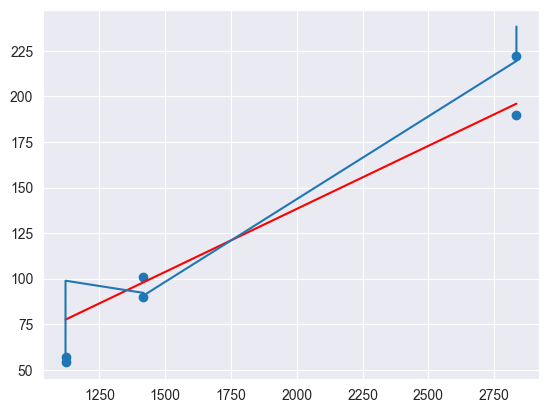

In [96]:
df_CN_E_final.sort_values('LBH', inplace=True)
plt.scatter(df_CN_E_final['LBH'], df_CN_E_final['W'])
plt.plot(df_CN_E_final['LBH'], df_CN_E_final['fit_result'], color='red')
plt.plot(df_CN_E_final['LBH'], df_CN_E_final['fit_result_noise'])
plt.show()

In [61]:
df_CN_E_final.to_excel('../data/LN_E_W 피팅_noise.xlsx')

In [46]:
df_W_std

,선종_블록,공종_명칭,property,표준편차
0,BC_A,Final조립,W,3.500000
1,BC_B,Final조립,W,0.000000
2,BC_E,Final조립,W,64.399793
3,BC_F,Final조립,W,14.282857
4,BC_S,Final조립,W,50.500000
5,CN_A,Final조립,W,39.668394
6,CN_B,Final조립,W,35.174835
7,CN_D,Final조립,W,47.087455
8,CN_E,Final조립,W,59.263871
9,CN_F,Final조립,W,74.250274


In [47]:
df_W_std.to_excel('../data/그룹별 표준편차_W.xlsx')

In [41]:
df_L_std

,선종_블록,공종_명칭,property,표준편차
0,BC_A,Final조립,L,0.000000
1,BC_A,평중조,L,NaN
2,BC_A,곡중조,L,NaN
3,BC_A,대조중조,L,0.000000
4,BC_B,Final조립,L,0.000000
...,...,...,...,...
175,VL_F,대조중조,L,0.000000
176,VL_S,Final조립,L,0.935414
177,VL_S,평중조,L,NaN
178,VL_S,곡중조,L,NaN


In [44]:
df_L_std[df_L_std.isna().any(axis=1)]

,선종_블록,공종_명칭,property,표준편차
1,BC_A,평중조,L,NaN
2,BC_A,곡중조,L,NaN
5,BC_B,평중조,L,NaN
7,BC_B,대조중조,L,NaN
13,BC_F,평중조,L,NaN
18,BC_S,곡중조,L,NaN
30,CN_D,곡중조,L,NaN
44,CN_T,Final조립,L,NaN
47,CN_T,대조중조,L,NaN
53,LN_B,평중조,L,NaN


In [15]:
for group in df_revised_for_group_count['선종_블록']:
    df_revised_for_group_relation = df_revised_for_group[df_revised_for_group['선종_블록'] == group]
    plt.scatter(df_revised_for_group_relation['B'], df_revised_for_group_relation['H01'])
    plt.xlabel('B')
    plt.ylabel('H01')
    plt.title(f'{group} H01')
    plt.savefig(f'../data/H01 그래프/{group}_H01_산점도_B.png')
    plt.close()

In [18]:
for group in df_revised_for_group_count['선종_블록']:
    df_revised_for_group_relation = df_revised_for_group[df_revised_for_group['선종_블록'] == group]
    df_revised_for_group_relation['LBH'] = df_revised_for_group_relation['L'] * df_revised_for_group_relation['B'] * df_revised_for_group_relation['H']
    df_revised_for_group_final_W = df_revised_for_group_relation[df_revised_for_group_relation['공종_명칭'] == 'Final조립']
    plt.scatter(df_revised_for_group_final_W['LBH'], df_revised_for_group_final_W['W'])
    plt.xlabel('LBH')
    plt.ylabel('W')
    plt.title(f'{group} W')
    plt.savefig(f'../data/W 그래프/{group}_W_산점도_LBH.png')
    plt.close()

C:\Users\kimjh\AppData\Local\Temp\ipykernel_43868\729286728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revised_for_group_relation['LBH'] = df_revised_for_group_relation['L'] * df_revised_for_group_relation['B'] * df_revised_for_group_relation['H']
C:\Users\kimjh\AppData\Local\Temp\ipykernel_43868\729286728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revised_for_group_relation['LBH'] = df_revised_for_group_relation['L'] * df_revised_for_group_relation['B'] * df_revised_for_group_relati

In [21]:
for group in df_revised_for_group_count['선종_블록']:
    df_revised_for_group_relation = df_revised_for_group[df_revised_for_group['선종_블록'] == group]
    df_revised_for_group_relation['LBH'] = df_revised_for_group_relation['L'] * df_revised_for_group_relation['B'] * df_revised_for_group_relation['H']
    df_revised_for_group_final_W = df_revised_for_group_relation[df_revised_for_group_relation['공종_명칭'] == 'Final조립']

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    x = df_revised_for_group_final_W['LBH']
    y = df_revised_for_group_final_W['W']
    z = df_revised_for_group_final_W['H01']
    ax.scatter(x, y, z)
    plt.xlabel('LBH')
    plt.ylabel('W')

    plt.title(f'{group} H01')
    plt.savefig(f'../data/H01 그래프/{group}_산점도_LBH&W.png')
    plt.close()

C:\Users\kimjh\AppData\Local\Temp\ipykernel_43868\1399189786.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revised_for_group_relation['LBH'] = df_revised_for_group_relation['L'] * df_revised_for_group_relation['B'] * df_revised_for_group_relation['H']
C:\Users\kimjh\AppData\Local\Temp\ipykernel_43868\1399189786.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revised_for_group_relation['LBH'] = df_revised_for_group_relation['L'] * df_revised_for_group_relation['B'] * df_revised_for_group_rela

In [24]:
def make_plot_property(group, process, property):
    df_revised_for_group_relation = df_revised_for_group[df_revised_for_group['선종_블록'] == group]

    df_revised_for_group_process = df_revised_for_group_relation[df_revised_for_group_relation['공종_명칭'] == process]

    sns.histplot(df_revised_for_group_process[property], bins=100)
    plt.xlabel(f'{property}')

    plt.title(f'{group} {property}')
    plt.savefig(f'../data/{property} 그래프/{process}/{group}_{process}_히스토그램.png')
    plt.close()

In [25]:
for group in df_revised_for_group_count['선종_블록']:
    for process in ['Final조립', '평중조', '곡중조', '대조중조']:
        for property in ['L', 'B', 'H']:
            make_plot_property(group, process, property)

In [9]:
df_revised_for_group_final = df_revised_for_group[df_revised_for_group['공종_명칭'] == 'Final조립']

df_revised_for_group_final_count = pd.DataFrame(df_revised_for_group_final['선종_블록'].value_counts())
df_revised_for_group_final_count.sort_index(inplace=True)
df_revised_for_group_final_count.reset_index(inplace=True)
df_revised_for_group_final_count

,선종_블록,count
0,BC_A,2
1,BC_B,1
2,BC_E,6
3,BC_F,4
4,BC_S,4
5,CN_A,105
6,CN_B,61
7,CN_D,36
8,CN_E,524
9,CN_F,131


In [89]:
for group in df_revised_for_group_count['선종_블록']:
    df_group = df_revised_for_group[df_revised_for_group['선종_블록'] == group]
    df_group_L = df_group[['선종_블록', 'L']]
    df_group_L_count = pd.DataFrame(df_group_L.value_counts())
    df_group_L_count.reset_index(inplace=True)
    df_group_L_count.sort_values(by='L', ascending=True, inplace=True)
    fig, ax = plt.subplots()
    ax.bar(df_group_L_count['L'], df_group_L_count['count'])
    plt.xlim(0, df_group_L['L'].max() + 5)
    file_path = f'../data/L 그래프/L 그래프_bar_{group}.png'
    plt.savefig(file_path)
    plt.close()

In [90]:
for group in df_revised_for_group_count['선종_블록']:
    df_group = df_revised_for_group[df_revised_for_group['선종_블록'] == group]
    df_group_B = df_group[['선종_블록', 'B']]
    df_group_B_count = pd.DataFrame(df_group_B.value_counts())
    df_group_B_count.reset_index(inplace=True)
    df_group_B_count.sort_values(by='B', ascending=True, inplace=True)
    fig, ax = plt.subplots()
    ax.bar(df_group_B_count['B'], df_group_B_count['count'])
    plt.xlim(0, df_group_B['B'].max() + 5)
    file_path = f'../data/B 그래프/B 그래프_bar_{group}.png'
    plt.savefig(file_path)
    plt.close()

In [91]:
for group in df_revised_for_group_count['선종_블록']:
    df_group = df_revised_for_group[df_revised_for_group['선종_블록'] == group]
    df_group_H = df_group[['선종_블록', 'H']]
    df_group_H_count = pd.DataFrame(df_group_H.value_counts())
    df_group_H_count.reset_index(inplace=True)
    df_group_H_count.sort_values(by='H', ascending=True, inplace=True)
    fig, ax = plt.subplots()
    ax.bar(df_group_H_count['H'], df_group_H_count['count'])
    plt.xlim(0, df_group_H['H'].max() + 5)
    file_path = f'../data/H 그래프/H 그래프_bar_{group}.png'
    plt.savefig(file_path)
    plt.close()

In [81]:
# 3. 블록 제원(L, B, H) 피팅
# 선종_블록 코드별로 원하는 제원에 대하여 피팅을 하기 위한 함수
def making_model_property(group, property, fitting_method):
    df_group = df_revised_for_group[df_revised_for_group['선종_블록'] == group]
    df_L = df_group[['선종_블록', 'L']]
    df_B = df_group[['선종_블록', 'B']]
    df_H = df_group[['선종_블록', 'H']]

    if property == 'L':
        df_code = df_L.copy()

    elif property == 'B':
        df_code = df_B.copy()

    elif property == 'H':
        df_code = df_H.copy()

    df_code_count = pd.DataFrame(df_code[property].value_counts())
    df_code_count.reset_index(inplace=True)
    df_code_count.sort_values(property, inplace=True)
    df_code_count['Density'] = df_code_count['count'] / df_code_count['count'].sum()


    if fitting_method == 'beta':
        df_forbeta = df_code_count[[property, 'Density']]
        array_forbeta = df_forbeta.to_numpy()
        a, b, loc, scale = beta.fit(array_forbeta)
        pdf_beta = beta.pdf(df_code_count[property], a, b, loc, scale)
        df_code_count['fit_result'] = pdf_beta

    elif fitting_method == 'lognorm':
        df_lognorm = df_code_count[[property, 'Density']]
        array_lognorm = df_lognorm.to_numpy()
        s, loc, scale = lognorm.fit(array_lognorm[:,1])
        pdf_lognorm = lognorm.pdf(df_code_count[property], s, loc, scale)
        df_code_count['fit_result'] = pdf_lognorm

    elif fitting_method == 'alpha':
        df_alpha = df_code_count[[property, 'Density']]
        array_alpha = df_alpha.to_numpy()
        a, loc, scale = alpha.fit(array_alpha)
        pdf_alpha = alpha.pdf(df_code_count[property], a, loc, scale)
        df_code_count['fit_result'] = pdf_alpha

    elif fitting_method == 'anglit':
        df_anglit = df_code_count[[property, 'Density']]
        array_anglit = df_anglit.to_numpy()
        loc, scale = anglit.fit(array_anglit)
        pdf_anglit = anglit.pdf(df_code_count[property], loc, scale)
        df_code_count['fit_result'] = pdf_anglit

    elif fitting_method == 'arcsine':
        df_arcsine = df_code_count[[property, 'Density']]
        array_arcsine = df_arcsine.to_numpy()
        loc, scale = arcsine.fit(array_arcsine)
        pdf_arcsine = arcsine.pdf(df_code_count[property], loc, scale)
        df_code_count['fit_result'] = pdf_arcsine


    return df_code_count

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,0.80315,747.82471,756.89809,inf,0.11864,0.00000
norm,0.84278,703.09920,712.17259,inf,0.13320,0.00000
lognorm,0.84278,705.09870,718.70878,inf,0.13320,0.00000
gamma,0.84441,702.90781,716.51788,inf,0.13663,0.00000
chi2,0.85074,694.31597,707.92605,inf,0.14777,0.00000


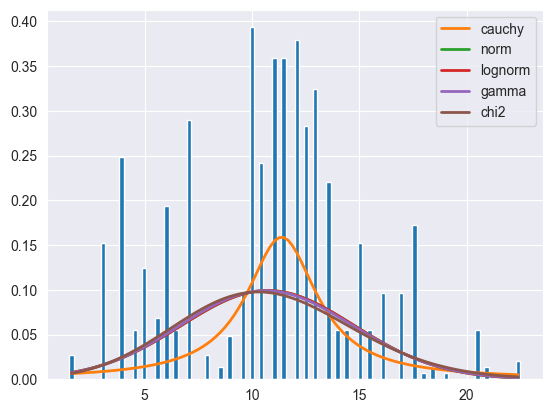

In [167]:
df_group = df_revised_for_group[df_revised_for_group['선종_블록'] == 'CN_S']
df_L = df_group[['선종_블록', 'B']]
df_code = df_L.copy()
df_code_count = pd.DataFrame(df_code['B'].value_counts())
df_code_count.reset_index(inplace=True)
df_code_count.sort_values('B', inplace=True)
df_code_count['Density'] = df_code_count['count'] / df_code_count['count'].sum()
distributions_list = get_common_distributions()

data = []
for b, c in zip(df_code_count['B'], df_code_count['count']):
    data.extend([b]*c)
data = np.array(data)

f = Fitter(data, distributions=distributions_list)
f.fit()
f.summary()

In [162]:
df_code_count

,B,count,Density
27,1.50000,4,0.00580
12,3.00000,22,0.03188
7,4.00000,36,0.05217
20,4.50000,8,0.01159
14,5.00000,18,0.02609
18,5.50000,10,0.01449
10,6.00000,28,0.04058
22,6.50000,8,0.01159
5,7.00000,42,0.06087
26,8.00000,4,0.00580


In [163]:
best_distribution = f.get_best()
best_distribution_name = list(best_distribution.keys())[0]
best_params = f.fitted_param[best_distribution_name]

print(best_distribution_name)
print(best_params)
print(best_distribution)

cauchy
(11.384441539616788, 2.0035082104600983)
{'cauchy': {'loc': 11.384441539616788, 'scale': 2.0035082104600983}}


In [172]:
cauchy.rvs(*best_params)

18.50890196032305

In [165]:
pdf_cauchy

0.010893280793461793

In [139]:
df_code_count['fit_result'] = pdf_cauchy

df_code_count

,B,count,Density,fit_result
27,1.50000,4,0.00580,0.00627
12,3.00000,22,0.03188,0.00858
7,4.00000,36,0.05217,0.01089
20,4.50000,8,0.01159,0.01241
14,5.00000,18,0.02609,0.01424
18,5.50000,10,0.01449,0.01650
10,6.00000,28,0.04058,0.01932
22,6.50000,8,0.01159,0.02288
5,7.00000,42,0.06087,0.02744
26,8.00000,4,0.00580,0.04123


In [140]:
df_code_count.to_excel('../data/example_fit_gen.xlsx')

In [156]:
def make_fitting_property(group, property):
    df_code = df_revised_for_group[df_revised_for_group['선종_블록'] == group]
    df_for_fit = df_code[['선종_블록', property]]
    df_for_fit_count = pd.DataFrame(df_for_fit[property].value_counts())
    df_for_fit_count.reset_index(inplace=True)
    df_for_fit_count.sort_values(property, inplace=True)

    df_for_fit_count['Density'] = df_for_fit_count['count'] / df_for_fit_count['count'].sum()

    data = []
    for p, c in zip(df_for_fit_count[property], df_for_fit_count['count']):
        data.extend([p]*c)
    data = np.array(data)

    f = Fitter(data, distributions=distributions_list)
    f.fit()
    f.summary()

    best_distribution = f.get_best()
    best_distribution_name = list(best_distribution.keys())[0]
    best_params = f.fitted_param[best_distribution_name]

    print(best_distribution_name)
    print(best_params)
    print(best_distribution)

    if best_distribution_name == 'cauchy':
        pdf_fit = cauchy.pdf(df_for_fit_count[property], *best_params)

    df_for_fit_count['fit_result'] = pdf_fit

    return df_for_fit_count

cauchy
(7.00771201509119, 1.1867115239051316)
{'cauchy': {'loc': 7.00771201509119, 'scale': 1.1867115239051316}}


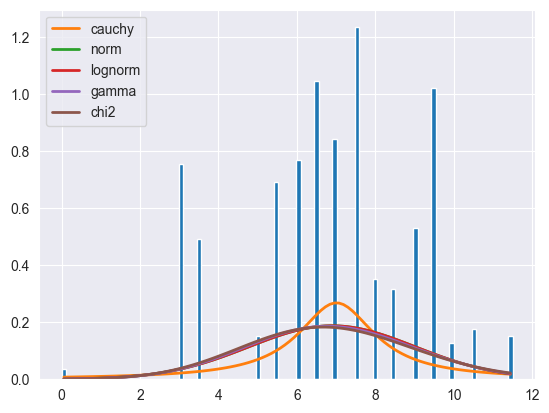

In [158]:
df_ex = make_fitting_property('CN_S', 'H')

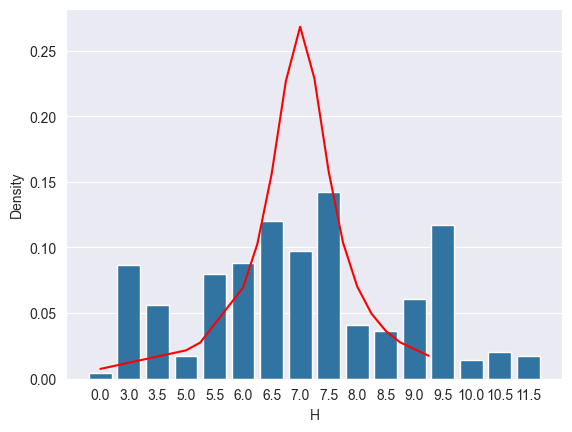

In [160]:
sns.barplot(x='H', y='Density', data=df_ex)
plt.plot(df_ex['H'], df_ex['fit_result'], color='r')
plt.show()

중량 재피팅

In [30]:
df_for_weight = df_revised_for_group[df_revised_for_group['W'] > 0]

df_for_weight

,index,정반_코드,호선_코드,블록,단위블록_CODE,공종_명칭,stage_코드,선종_코드,취부팀_코드,용접팀_코드,...,실적공기,H00,H01,H02,W,B,L,H,A,선종_블록
0,2,M212,CN047,S22S0,11A0,Final조립,S032,CN,B02,B02,...,22.0,0,1469,766,150,17.5,21.0,8.0,367.5,CN_S
2,4,M211,BC001,F51P0,05A0,Final조립,S032,BC,B02,B02,...,15.0,0,623,386,126,17.5,23.0,6.0,402.5,BC_F
4,12,M025,LN017,B19S0,03A0,Final조립,S032,LN,A05,B03,...,11.0,70,492,243,124,18.0,19.0,3.0,342.0,LN_B
7,15,M033,TK001,S19S0,11A0,Final조립,S032,TK,B08,B08,...,9.0,0,1305,683,300,23.5,20.0,8.5,470.0,TK_S
8,16,M021,CN011,E23P0,11A0,Final조립,S022,CN,B04,B04,...,11.0,15,365,250,27,8.0,17.5,3.0,140.0,CN_E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6923,11903,M211,CN008,F61S0,05A0,Final조립,S032,CN,B02,B02,...,8.0,2,1644,1714,151,23.0,21.5,6.5,494.5,CN_F
6924,11910,M210,LN004,E11S0,03A0,Final조립,S032,LN,B02,B02,...,12.0,0,952,957,215,13.0,22.0,6.0,286.0,LN_E
6932,11948,M022,LN004,E22P0,11A0,Final조립,S022,LN,A01,A02,...,6.0,78,183,183,11,5.0,11.0,3.5,55.0,LN_E
6933,11949,M022,LN004,E22S0,11A0,Final조립,S022,LN,A01,A02,...,6.0,79,180,180,11,5.0,11.0,3.5,55.0,LN_E


In [32]:
df_for_weight[df_for_weight['공종_명칭'] == '곡중조']

,index,정반_코드,호선_코드,블록,단위블록_CODE,공종_명칭,stage_코드,선종_코드,취부팀_코드,용접팀_코드,...,실적공기,H00,H01,H02,W,B,L,H,A,선종_블록
3685,6458,M221,CN030,S41S0,11A0,곡중조,S021,CN,B09,B09,...,11.0,0,100,468,100,9.0,16.5,7.5,148.5,CN_S
3697,6491,M222,CN030,S41P0,11A0,곡중조,S021,CN,B09,B09,...,7.0,0,100,468,100,9.0,16.5,7.5,148.5,CN_S


In [33]:
df_for_weight['공종_명칭'].value_counts()

공종_명칭
Final조립    2836
곡중조           2
Name: count, dtype: int64

In [35]:
df_for_weight_final = df_for_weight[df_for_weight['공종_명칭'] == 'Final조립']
df_for_weight_final['LBH'] = df_for_weight_final['L'] * df_for_weight_final['H'] * df_for_weight_final['B']
df_for_weight_final

C:\Users\kimjh\AppData\Local\Temp\ipykernel_1812\4047165263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_weight_final['LBH'] = df_for_weight_final['L'] * df_for_weight_final['H'] * df_for_weight_final['B']


,index,정반_코드,호선_코드,블록,단위블록_CODE,공종_명칭,stage_코드,선종_코드,취부팀_코드,용접팀_코드,...,H00,H01,H02,W,B,L,H,A,선종_블록,LBH
0,2,M212,CN047,S22S0,11A0,Final조립,S032,CN,B02,B02,...,0,1469,766,150,17.5,21.0,8.0,367.5,CN_S,2940.00
2,4,M211,BC001,F51P0,05A0,Final조립,S032,BC,B02,B02,...,0,623,386,126,17.5,23.0,6.0,402.5,BC_F,2415.00
4,12,M025,LN017,B19S0,03A0,Final조립,S032,LN,A05,B03,...,70,492,243,124,18.0,19.0,3.0,342.0,LN_B,1026.00
7,15,M033,TK001,S19S0,11A0,Final조립,S032,TK,B08,B08,...,0,1305,683,300,23.5,20.0,8.5,470.0,TK_S,3995.00
8,16,M021,CN011,E23P0,11A0,Final조립,S022,CN,B04,B04,...,15,365,250,27,8.0,17.5,3.0,140.0,CN_E,420.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6923,11903,M211,CN008,F61S0,05A0,Final조립,S032,CN,B02,B02,...,2,1644,1714,151,23.0,21.5,6.5,494.5,CN_F,3214.25
6924,11910,M210,LN004,E11S0,03A0,Final조립,S032,LN,B02,B02,...,0,952,957,215,13.0,22.0,6.0,286.0,LN_E,1716.00
6932,11948,M022,LN004,E22P0,11A0,Final조립,S022,LN,A01,A02,...,78,183,183,11,5.0,11.0,3.5,55.0,LN_E,192.50
6933,11949,M022,LN004,E22S0,11A0,Final조립,S022,LN,A01,A02,...,79,180,180,11,5.0,11.0,3.5,55.0,LN_E,192.50


In [41]:
df_for_weight_final_group = pd.DataFrame(df_for_weight_final['선종_블록'].value_counts())
df_for_weight_final_group.reset_index(inplace=True)

df_for_weight_final_group

,선종_블록,count
0,CN_E,524
1,CN_S,427
2,LN_E,332
3,LN_B,142
4,LN_S,134
5,CN_F,131
6,LN_F,114
7,CN_A,105
8,TK_E,83
9,LP_E,82


In [53]:
def making_model_weight_final(code, using_only_B=False):
    df_for_weight_final_code = df_for_weight_final[df_for_weight_final['선종_블록'] == code]
    if using_only_B:
        x = df_for_weight_final_code['B'].to_numpy()
        x = x.reshape(-1, 1)

        y = df_for_weight_final_code['W'].to_numpy()
    else:
        x = df_for_weight_final_code['LBH'].to_numpy()
        x = x.reshape(-1, 1)

        y = df_for_weight_final_code['W'].to_numpy()

    reg = linear_model.LinearRegression()
    reg.fit(x, y)

    y_pred = reg.predict(x)

    df_for_weight_final_code['fit_result'] = np.trunc(y_pred)
    df_for_weight_final_code['fit_result'] = round(df_for_weight_final_code['fit_result'], 0)
    return df_for_weight_final_code

In [52]:
with pd.ExcelWriter('../data/중량 피팅_Final조립.xlsx') as writer:
    for code in df_for_weight_final_group['선종_블록']:
        df_weight_code = making_model_weight_final(code)
        df_weight_code.to_excel(writer, sheet_name=code)

C:\Users\kimjh\AppData\Local\Temp\ipykernel_1812\4172761724.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_weight_final_code['fit_result'] = np.trunc(y_pred)
C:\Users\kimjh\AppData\Local\Temp\ipykernel_1812\4172761724.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_weight_final_code['fit_result'] = round(df_for_weight_final_code['fit_result'], 0)
C:\Users\kimjh\AppData\Local\Temp\ipykernel_1812\4172761724.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [54]:
with pd.ExcelWriter('../data/중량 피팅_Final조립_B만 사용.xlsx') as writer:
    for code in df_for_weight_final_group['선종_블록']:
        df_weight_code = making_model_weight_final(code, using_only_B=True)
        df_weight_code.to_excel(writer, sheet_name=code)

C:\Users\kimjh\AppData\Local\Temp\ipykernel_1812\68531593.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_weight_final_code['fit_result'] = np.trunc(y_pred)
C:\Users\kimjh\AppData\Local\Temp\ipykernel_1812\68531593.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_weight_final_code['fit_result'] = round(df_for_weight_final_code['fit_result'], 0)
C:\Users\kimjh\AppData\Local\Temp\ipykernel_1812\68531593.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [107]:
df_revised = pd.read_excel('../data/블록-계획데이터(예제)_수정_선종블록 추가.xlsx')

df_revised_for_group = df_revised.copy()
group_list = []
for i in range(df_revised.shape[0]):
    group_code = df_revised.loc[i, '선종_코드'] + '_' + df_revised.loc[i, '블록'][0]
    group_list.append(group_code)
df_revised_for_group['선종_블록'] = group_list
df_group_count = pd.DataFrame(df_revised_for_group['선종_블록'].value_counts())
df_group_count.reset_index(inplace=True)
df_group_count['Proportion'] = df_group_count['count'] / df_group_count['count'].sum()
df_group_count['panel_count'] = 0
df_group_count['curve_count'] = 0
df_group_count['big_count'] = 0
df_group_count['final_count'] = 0

for code in df_group_count['선종_블록']:
    panel = 0
    curve = 0
    big = 0
    final = 0

    df_for_group = df_revised_for_group[df_revised_for_group['선종_블록'] == code]
    for process in df_for_group['공종_명칭']:
        if process == '평중조':
            panel += 1
        elif process == '곡중조':
            curve += 1
        elif process == '대조중조':
            big += 1
        elif process == 'Final조립':
            final += 1

    df_group_count.loc[df_group_count['선종_블록'] == code, 'panel_count'] = panel
    df_group_count.loc[df_group_count['선종_블록'] == code, 'curve_count'] = curve
    df_group_count.loc[df_group_count['선종_블록'] == code, 'big_count'] = big
    df_group_count.loc[df_group_count['선종_블록'] == code, 'final_count'] = final

In [108]:
df_group_count

,선종_블록,count,Proportion,panel_count,curve_count,big_count,final_count
0,CN_E,1192,0.171807,110,241,317,524
1,CN_B,808,0.116460,8,446,293,61
2,LN_E,718,0.103488,92,240,54,332
3,CN_S,690,0.099452,62,136,65,427
4,CN_F,397,0.057221,3,217,46,131
5,LN_F,299,0.043096,2,162,21,114
6,LN_B,294,0.042375,0,54,98,142
7,CN_A,249,0.035889,8,60,76,105
8,LP_S,224,0.032286,0,68,116,40
9,LN_A,215,0.030989,8,108,26,73


In [109]:
df_group_count.to_excel('../data/선종블록_공정수.xlsx')